In [1]:
import pandas as pd
import numpy as np

In [2]:
housing=pd.read_csv(r"C:\Users\archi\OneDrive\Desktop\data.csv")

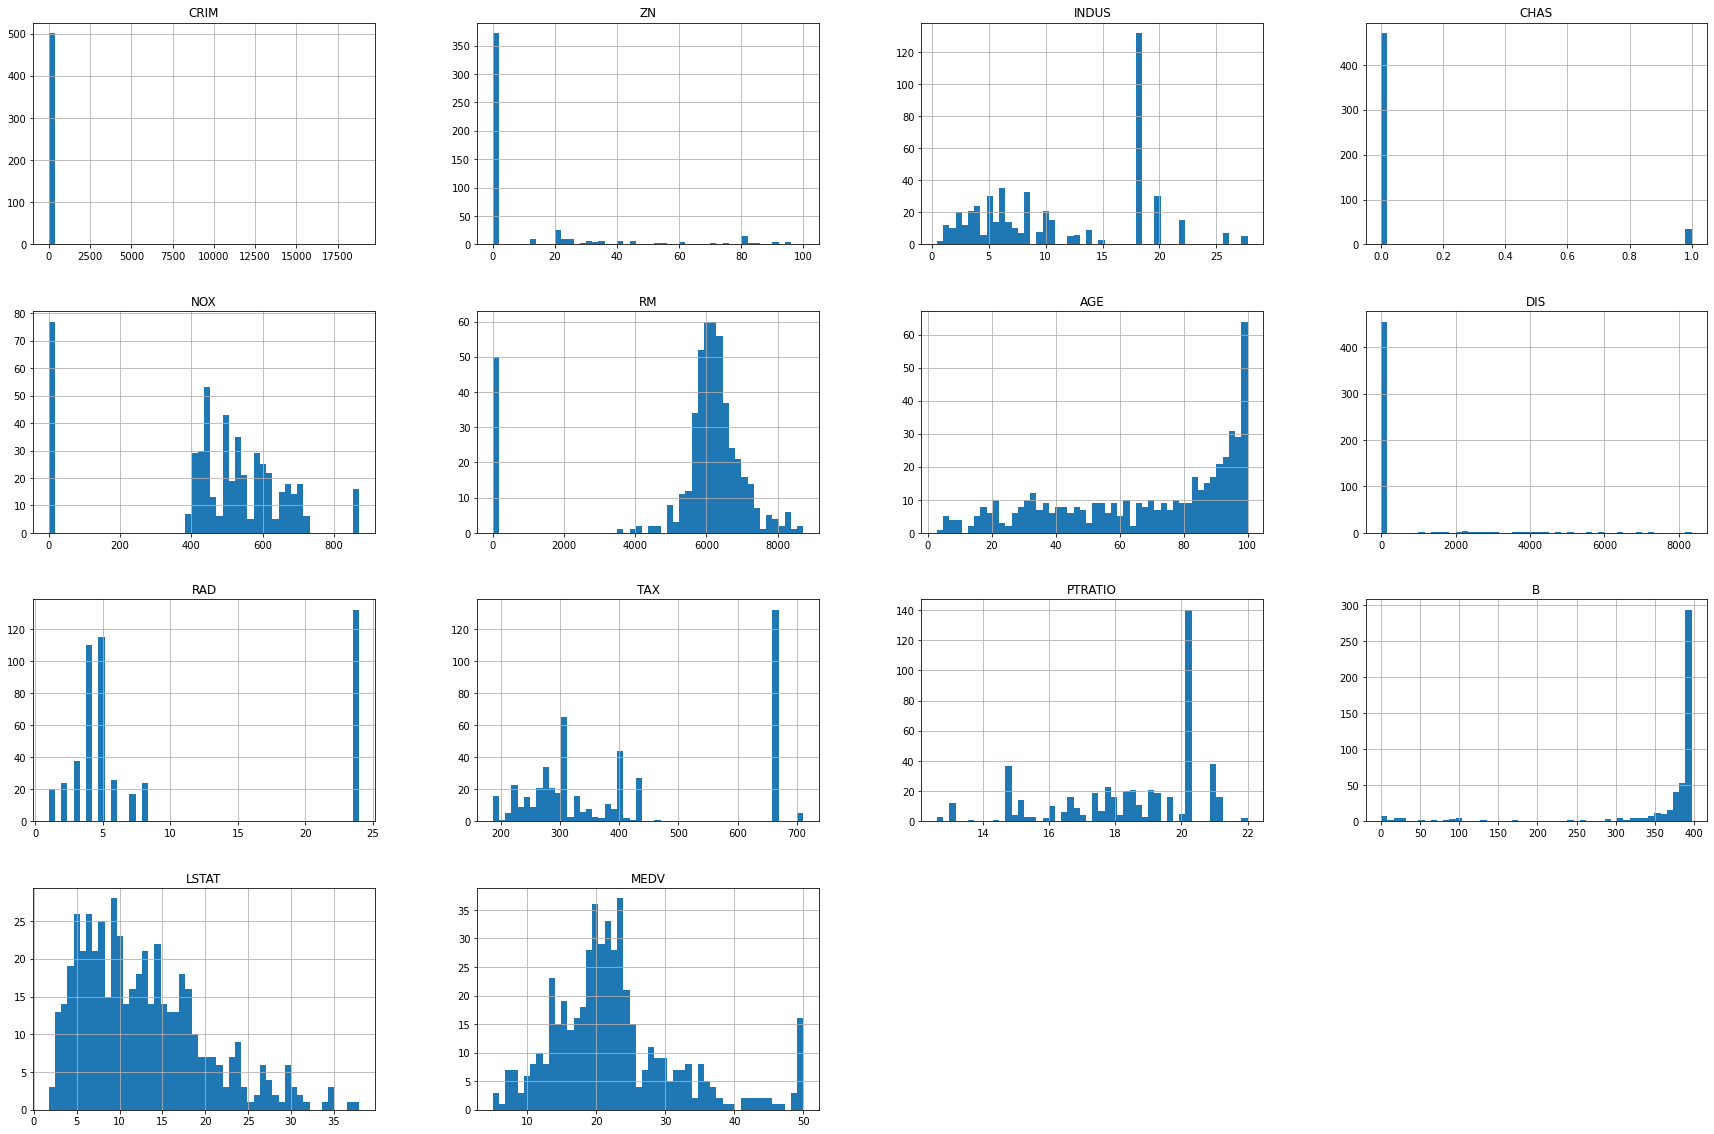

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(30,20))
plt.show()

In [4]:
def split_train_test(data,test_ratio):
    np.random.seed(42) #fix the shuffled value
    shuffled=np.random.permutation(len(housing))
#     print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]



In [5]:
train_set,test_set=split_train_test(housing,0.2)
print(len(train_set))
print(len(test_set))


405
101


###### Stratified sampling: one attribute to be equally distributed in testing and training as well
CHAS=stratified sampling's important attribute to be used as one hot encoding dummy variable.
Perfom stratified shuffled split


In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
    

# Correlations:


In [8]:
corr=housing.corr()

In [9]:
corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
ZN         0.360445
B          0.333461
RM         0.178065
CHAS       0.175260
DIS        0.096858
CRIM      -0.056357
NOX       -0.099473
AGE       -0.376955
RAD       -0.381626
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

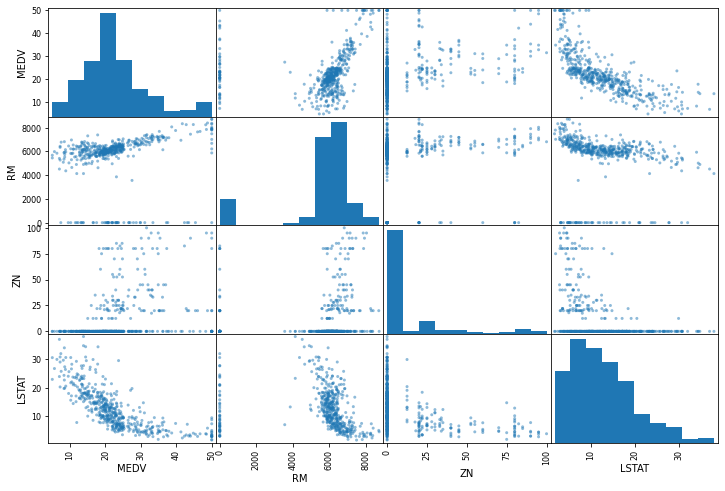

In [10]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

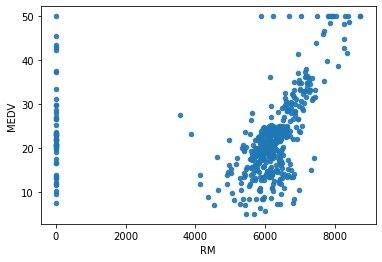

In [11]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.9)

In [12]:
housing['TAXRM']=housing['TAX']/housing['RM']
housing['TAXRM']

0       0.045019
1       0.037689
2       0.033681
3       0.031723
4       0.031062
         ...    
501     0.041408
502    44.607843
503     0.039134
504     0.040183
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

In [13]:
corr1=housing.corr()
corr1['MEDV'].sort_values(ascending=False)

MEDV       1.000000
ZN         0.360445
B          0.333461
RM         0.178065
CHAS       0.175260
DIS        0.096858
TAXRM     -0.021297
CRIM      -0.056357
NOX       -0.099473
AGE       -0.376955
RAD       -0.381626
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

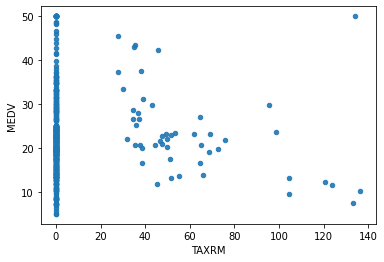

In [14]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.9)

In [15]:
## Missing attributes


In [16]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)
 

SimpleImputer(strategy='median')

In [17]:
imputer.statistics_ #median of aall rows
  

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.04000000e+02, 6.12700000e+03, 7.75000000e+01, 3.51385000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 6.09189256e-02])